In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [94]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0,cluster_std=0.6)

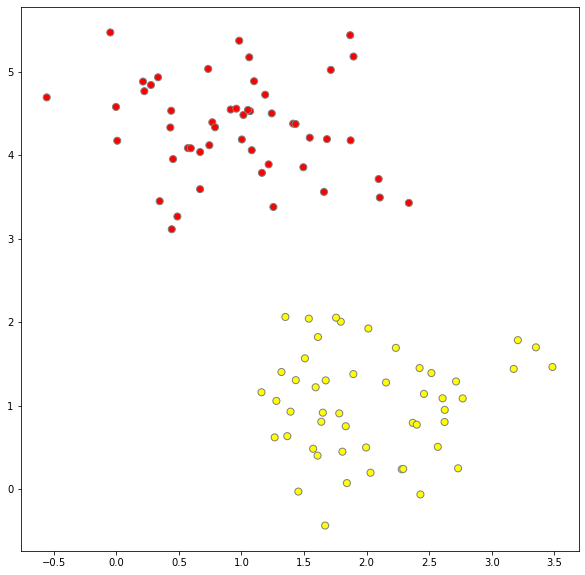

In [95]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn',s=50,edgecolors='grey')

In [96]:
from sklearn.svm import SVC

In [97]:
model = SVC(kernel='linear', decision_function_shape='ovr')

In [98]:
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [99]:
model.decision_function(X)

array([ 2.03187624,  3.20113456, -3.69797518, -1.00028035,  2.85180935,
       -1.20956894, -2.56753486,  1.85572697, -2.52652805,  3.49695155,
       -2.95912003,  3.1355151 , -3.65525172, -2.94853325,  2.15473444,
        2.44214159,  4.17867997, -2.51727231,  3.19698028,  2.32645774,
       -3.09108242, -2.85744844,  1.37079784, -3.80200154,  3.21310471,
       -3.16334199,  3.63730628, -4.46118672, -3.00238026,  1.74379653,
        4.0775239 , -3.03277349,  2.73914564,  4.07458436,  1.12635218,
       -2.39357127,  2.82727011,  1.31500036, -1.39042072,  2.30683491,
       -1.5625609 , -3.91525291, -4.89310189, -2.03441897,  0.91822939,
        2.3843489 ,  4.07687992,  4.22457282, -3.45709   , -3.988095  ,
        3.58456434,  2.5034271 , -4.33051088, -3.37317902, -0.99985841,
       -3.11835881, -1.16359978,  2.87593889,  2.80744198,  4.5982448 ,
        2.21659282, -2.4574229 , -3.9339336 ,  2.68284366, -4.12255755,
        1.03950327, -2.33909524, -1.52060412,  2.51395868, -1.90

In [100]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [101]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637],
       [1.53853211, 2.04370263]])

In [102]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

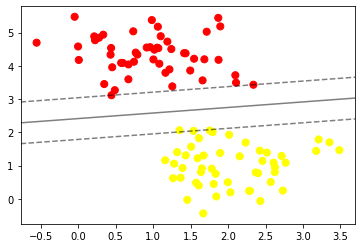

In [103]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);